In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras import Model

Start projektu - model sieci neuronowej zdefiniowany obiektowo<br>
budowa modelu opartego na klasie Pythona z użyciem funkcji specjalnych: **init,call,repr**

In [2]:
#zbiór danych
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#dodanie kanału dla CNN
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#przygotowanie zbiorów danych do przetwarzania wsadowego dla modelu
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
x_test.shape

(10000, 28, 28, 1)

Budowa modelu w oparciu o interfejs: API do tworzenia podklas modelu KERAS

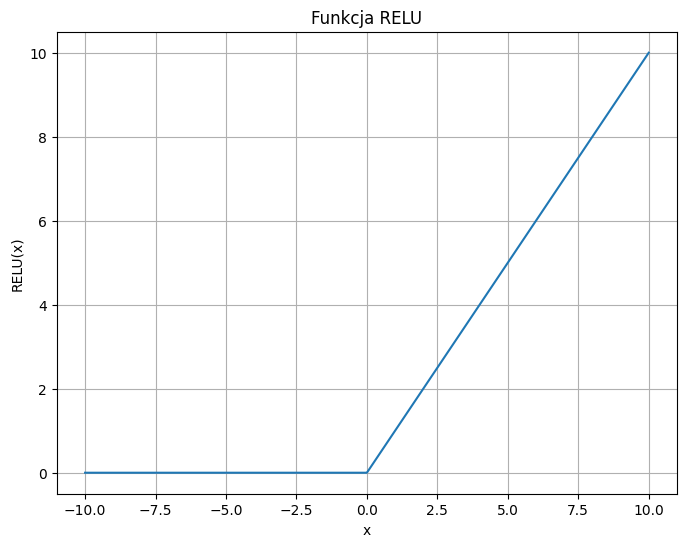

In [8]:
def relu(x):
  return np.maximum(0,x)

#napisz w matplotlib wykres funkcji relu na bazie funkcji relu(x), zbuduj dziedzinę funkcji w zakresie (-10,10) i podziel ją na 1000 punktów
#wyrysuj ten wykres podpisując go "funkcja relu", opisz osie x-> x, y > RELU(x)
#zapisz wykres do pliku relu.png

x = np.linspace(-10,10,1000)
y = relu(x)

plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("RELU(x)")
plt.title("Funkcja RELU")
plt.grid(True)
plt.savefig("relu.png")
plt.show()

In [11]:
#klasa reprezentująca sieć neuronową
class ModelNeuralNet(Model):
  def __init__(self):
    super(ModelNeuralNet, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

  def __repr__(self) -> str:
    return f"klasa {self.__class__.__name__} -> wynik funkcji call: połączone warstwy modelu"

In [12]:
model  = ModelNeuralNet()
print(model)

klasa ModelNeuralNet -> wynik funkcji call: połączone warstwy modelu
